In [55]:
# Author: Emmanuel Akinrintoyo
# import Python libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# convert watts to dBm
def WattsTodBm(values):
    conversion = 10 * np.log10(1000 * values)
    return conversion


# basis function for the curve fitting
def basis(x, m, b):
    return m * x + b


# calculates the end to end tilt
def computeEndToEndTilt(indices, data):
    params, _ = curve_fit(basis, indices, data)
    x_vals = np.arange(min(indices), max(indices), 1)
    y_vals = basis(x_vals, params[0], params[1])
    tiltval = max(y_vals) - min(y_vals)
    return tiltval, y_vals


# returns the wavelengths for the plots
def convertToWavelength(values):
    fr = 191350  # MHz
    c = 299792458  # m/s
    fr_arr = []  # frequency array
    wavelengths = []
    for i in range(0, 90):
        val = (fr + (i*50)) * 10e9
        fr_arr.append(val)
        wavelengths.append((c / val) * 10e9)
    wavelengths = np.array(wavelengths)
    return wavelengths


# reads the CSV file in the path
def readCSVData(filename):
    path = '../Plots/UniformVrandom/' + filename + '.csv'
    data = pd.read_csv(path)
    data = data.iloc[:, 1].values
    data = WattsTodBm(data)
    data = data - np.mean(data)
    return data


# add labels and save the figures
def plotProperties():
    plt.xlabel("Wavelength (nm)", fontsize=16, fontname="Arial")
    plt.ylabel("${\Delta}$P (dB)", fontsize=16, fontname="Arial")
    plt.savefig('SRSplot.eps', format='eps', dpi=900, bbox_inches='tight')
    plt.legend()


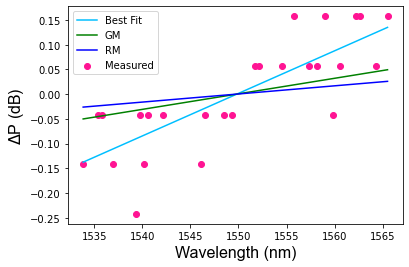

In [56]:
# COSMOS data 26 randomly loaded channels
activated_channels_26 = [3, 6, 10, 11, 15, 17, 19, 21, 23, 27, 30, 36, 37, 43,
                         45, 50, 51, 61, 65, 66, 67, 68, 74, 77, 78, 82]

output_spectrum_26 = [-11.3, -11.4, -11.3, -11.3, -11.4, -11.5, -11.3, -11.4,
                      -11.4, -11.3, -11.4, -11.4, -11.4, -11.5, -11.5, -11.5,
                      -11.6, -11.5, -11.5, -11.6, -11.5, -11.7, -11.6, -11.5,
                      -11.5, -11.6]

output_spectrum_26 = output_spectrum_26 - np.mean(output_spectrum_26)
wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_26]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_26, output_spectrum_26)
plt.scatter(wav, output_spectrum_26, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm26 = readCSVData("GeneralForm/preamp_in_50_Actual_0_26")
gm26_tilt, gm26_y1 = computeEndToEndTilt(activated_channels_26, gm26)
plt.plot([min(wav), max(wav)], [min(gm26_y1), max(gm26_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm26 = readCSVData("UniformForm/preamp_in_50_Actual_0_26")
rm26_tilt, rm26_y1 = computeEndToEndTilt(activated_channels_26, rm26)
plt.plot([min(wav), max(wav)], [min(rm26_y1), max(rm26_y1)], color='b',
         label='RM')

plotProperties()


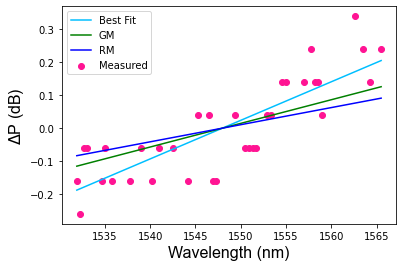

In [57]:
# COSMOS data 35 randomly loaded channels
activated_channels_35 = [3, 6, 8, 10, 19, 20, 21, 22, 24, 29, 30, 33, 34, 37,
                         38, 39, 40, 43, 48, 49, 50, 53, 56, 60, 64, 66, 69,
                         72, 77, 79, 80, 84, 85, 86, 87]

output_spectrum_35 = [-11.2, -11.3, -11.2, -11.1, -11.4, -11.3, -11.3, -11.2,
                      -11.3, -11.3, -11.3, -11.4, -11.4, -11.5, -11.5, -11.5,
                      -11.5, -11.4, -11.6, -11.6, -11.4, -11.4, -11.6, -11.5,
                      -11.5, -11.6, -11.5, -11.6, -11.6, -11.5, -11.6, -11.5,
                      -11.5, -11.7, -11.6]

output_spectrum_35 = output_spectrum_35 - np.mean(output_spectrum_35)
wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_35]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_35, output_spectrum_35)
plt.scatter(wav, output_spectrum_35, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm35 = readCSVData("GeneralForm/preamp_in_50_Actual_0_35")
gm35_tilt, gm35_y1 = computeEndToEndTilt(activated_channels_35, gm35)
plt.plot([min(wav), max(wav)], [min(gm35_y1), max(gm35_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm35 = readCSVData("UniformForm/preamp_in_50_Actual_0_35")
rm35_tilt, rm35_y1 = computeEndToEndTilt(activated_channels_35, rm35)
plt.plot([min(wav), max(wav)], [min(rm35_y1), max(rm35_y1)], color='b',
         label='RM')

plotProperties()


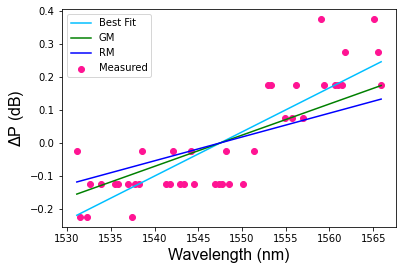

In [58]:
# COSMOS data 41 randomly loaded channels
activated_channels_41 = [2, 3, 4, 12, 13, 14, 15, 18, 19, 24, 26, 27, 29, 33,
                         34, 38, 41, 45, 46, 47, 48, 49, 55, 56, 58, 59, 61,
                         62, 63, 70, 71, 72, 73, 74, 77, 78, 82, 85, 86, 88, 89
                         ]

output_spectrum_41 = [-11.2, -11.1, -11.0, -11.1, -11.2, -11.2, -11.2, -11.2,
                      -11.0, -11.3, -11.2, -11.3, -11.3, -11.2, -11.2, -11.4,
                      -11.5, -11.5, -11.4, -11.5, -11.5, -11.5, -11.5, -11.4,
                      -11.5, -11.5, -11.4, -11.5, -11.5, -11.4, -11.5, -11.5,
                      -11.6, -11.5, -11.5, -11.5, -11.5, -11.5, -11.6, -11.6,
                      -11.4]

output_spectrum_41 = output_spectrum_41 - np.mean(output_spectrum_41)

wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_41]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_41, output_spectrum_41)
plt.scatter(wav, output_spectrum_41, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm41 = readCSVData("GeneralForm/preamp_in_50_Actual_0_41")
gm41_tilt, gm41_y1 = computeEndToEndTilt(activated_channels_41, gm41)
plt.plot([min(wav), max(wav)], [min(gm41_y1), max(gm41_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm41 = readCSVData("UniformForm/preamp_in_50_Actual_0_41")
rm41_tilt, rm41_y1 = computeEndToEndTilt(activated_channels_41, rm41)
plt.plot([min(wav), max(wav)], [min(rm41_y1), max(rm41_y1)], color='b',
         label='RM')

plotProperties()


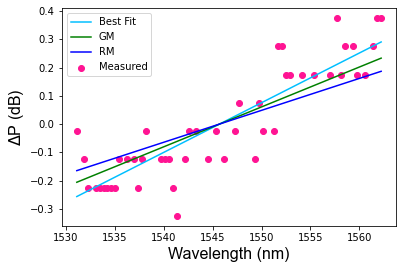

In [59]:
# COSMOS data 48 randomly loaded channels
activated_channels_48 = [11, 12, 13, 15, 17, 18, 20, 21, 22, 24, 28, 31, 34,
                         35, 36, 37, 38, 41, 42, 43, 47, 48, 51, 53, 55, 58,
                         60, 61, 63, 64, 65, 66, 67, 71, 72, 73, 74, 76, 78,
                         79, 80, 81, 82, 83, 84, 86, 87, 89]

output_spectrum_48 = [-11.1, -11.1, -11.2, -11.3, -11.3, -11.2, -11.2, -11.3,
                      -11.1, -11.3, -11.3, -11.3, -11.3, -11.3, -11.2, -11.2,
                      -11.5, -11.5, -11.4, -11.6, -11.4, -11.5, -11.6, -11.5,
                      -11.6, -11.5, -11.5, -11.6, -11.8, -11.7, -11.6, -11.6,
                      -11.6, -11.5, -11.6, -11.7, -11.6, -11.6, -11.6, -11.7,
                      -11.7, -11.7, -11.7, -11.7, -11.7, -11.7, -11.6, -11.5]

output_spectrum_48 = output_spectrum_48 - np.mean(output_spectrum_48)
wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_48]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_48, output_spectrum_48)
plt.scatter(wav, output_spectrum_48, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm48 = readCSVData("GeneralForm/preamp_in_50_Actual_0_48")
gm48_tilt, gm48_y1 = computeEndToEndTilt(activated_channels_48, gm48)
plt.plot([min(wav), max(wav)], [min(gm48_y1), max(gm48_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm48 = readCSVData("UniformForm/preamp_in_50_Actual_0_48")
rm48_tilt, rm48_y1 = computeEndToEndTilt(activated_channels_48, rm48)
plt.plot([min(wav), max(wav)], [min(rm48_y1), max(rm48_y1)], color='b',
         label='RM')

plotProperties()


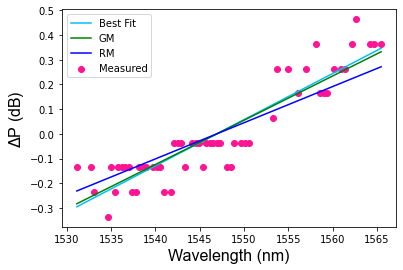

In [60]:
# COSMOS data 56 randomly loaded channels
activated_channels_56 = [3, 5, 6, 10, 11, 13, 14, 16, 18, 19, 20, 21, 24, 26,
                         29, 32, 33, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51,
                         52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66,
                         67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
                         84, 85, 89]

output_spectrum_56 = [-11.1, -11.1, -11.1, -11.0, -11.1, -11.2, -11.2, -11.2,
                      -11.3, -11.3, -11.3, -11.1, -11.2, -11.3, -11.2, -11.2,
                      -11.4, -11.5, -11.5, -11.5, -11.5, -11.6, -11.6, -11.5,
                      -11.5, -11.5, -11.5, -11.5, -11.6, -11.5, -11.5, -11.5,
                      -11.6, -11.5, -11.5, -11.5, -11.7, -11.7, -11.6, -11.6,
                      -11.6, -11.6, -11.6, -11.6, -11.7, -11.7, -11.6, -11.6,
                      -11.6, -11.6, -11.7, -11.6, -11.8, -11.7, -11.6, -11.6]

output_spectrum_56 = output_spectrum_56 - np.mean(output_spectrum_56)
wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_56]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_56, output_spectrum_56)
plt.scatter(wav, output_spectrum_56, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm56 = readCSVData("GeneralForm/preamp_in_50_Actual_0_56")
gm56_tilt, gm56_y1 = computeEndToEndTilt(activated_channels_56, gm56)
plt.plot([min(wav), max(wav)], [min(gm56_y1), max(gm56_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm56 = readCSVData("UniformForm/preamp_in_50_Actual_0_56")
rm56_tilt, rm56_y1 = computeEndToEndTilt(activated_channels_56, rm56)
plt.plot([min(wav), max(wav)], [min(rm56_y1), max(rm56_y1)], color='b',
         label='RM')

plotProperties()


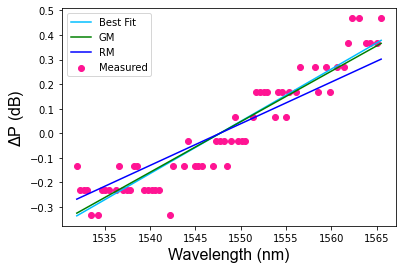

In [61]:
# COSMOS data 63 randomly loaded channels
activated_channels_63 = [3, 4, 6, 7, 9, 11, 12, 13, 15, 17, 18, 20, 21, 25, 26,
                         28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42,
                         43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 56, 57, 60,
                         61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76,
                         78, 79, 80, 81, 83, 84, 85, 86, 87]

output_spectrum_63 = [-11.0, -11.1, -11.1, -11.1, -11.0, -11.0, -11.1, -11.2,
                      -11.2, -11.3, -11.2, -11.3, -11.2, -11.2, -11.3, -11.3,
                      -11.4, -11.3, -11.3, -11.4, -11.3, -11.3, -11.3, -11.3,
                      -11.4, -11.5, -11.5, -11.5, -11.4, -11.5, -11.6, -11.5,
                      -11.5, -11.5, -11.6, -11.6, -11.6, -11.6, -11.5, -11.6,
                      -11.6, -11.8, -11.7, -11.7, -11.7, -11.7, -11.7, -11.6,
                      -11.6, -11.7, -11.7, -11.7, -11.6, -11.7, -11.7, -11.7,
                      -11.7, -11.8, -11.8, -11.7, -11.7, -11.7, -11.6]

output_spectrum_63 = output_spectrum_63 - np.mean(output_spectrum_63)

wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_63]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_63, output_spectrum_63)
plt.scatter(wav, output_spectrum_63, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm63 = readCSVData("GeneralForm/preamp_in_50_Actual_0_63")
gm63_tilt, gm63_y1 = computeEndToEndTilt(activated_channels_63, gm63)
plt.plot([min(wav), max(wav)], [min(gm63_y1), max(gm63_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm63 = readCSVData("UniformForm/preamp_in_50_Actual_0_63")
rm63_tilt, rm63_y1 = computeEndToEndTilt(activated_channels_63, rm63)
plt.plot([min(wav), max(wav)], [min(rm63_y1), max(rm63_y1)], color='b',
         label='RM')

plotProperties()


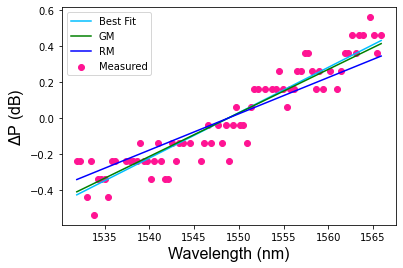

In [62]:
# COSMOS data 74 randomly loaded channels
activated_channels_74 = [2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19,
                         20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
                         34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
                         49, 50, 51, 52, 55, 57, 58, 59, 60, 61, 62, 63, 64,
                         65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79,
                         80, 81, 82, 83, 84, 86, 87]

output_spectrum_74 = [-11.0, -11.1, -11.0, -10.9, -11.0, -11.0, -11.1, -11.0,
                      -11.1, -11.1, -11.2, -11.3, -11.2, -11.3, -11.2, -11.3,
                      -11.2, -11.1, -11.1, -11.2, -11.2, -11.3, -11.3, -11.4,
                      -11.3, -11.2, -11.3, -11.3, -11.3, -11.3, -11.3, -11.4,
                      -11.6, -11.5, -11.5, -11.4, -11.5, -11.7, -11.5, -11.6,
                      -11.5, -11.6, -11.5, -11.6, -11.7, -11.6, -11.6, -11.6,
                      -11.7, -11.6, -11.8, -11.8, -11.7, -11.6, -11.7, -11.8,
                      -11.7, -11.7, -11.6, -11.7, -11.7, -11.7, -11.7, -11.7,
                      -11.7, -11.9, -11.8, -11.8, -11.8, -12.0, -11.7, -11.9,
                      -11.7, -11.7]

output_spectrum_74 = output_spectrum_74 - np.mean(output_spectrum_74)
wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_74]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_74, output_spectrum_74)
plt.scatter(wav, output_spectrum_74, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm74 = readCSVData("GeneralForm/preamp_in_50_Actual_0_74")
gm74_tilt, gm74_y1 = computeEndToEndTilt(activated_channels_74, gm74)
plt.plot([min(wav), max(wav)], [min(gm74_y1), max(gm74_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm74 = readCSVData("UniformForm/preamp_in_50_Actual_0_74")
rm74_tilt, rm74_y1 = computeEndToEndTilt(activated_channels_74, rm74)
plt.plot([min(wav), max(wav)], [min(rm74_y1), max(rm74_y1)], color='b',
         label='RM')

plotProperties()


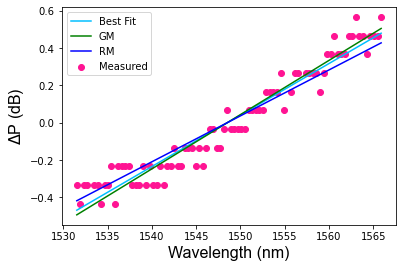

In [63]:
# COSMOS data 84 randomly loaded channels
activated_channels_84 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31,
                         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                         45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
                         58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
                         71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
                         85, 86, 87, 88]

output_spectrum_84 = [-10.9, -11.0, -11.0, -11.0, -11.1, -11.0, -11.0, -10.9,
                      -11.0, -11.0, -11.1, -11.1, -11.1, -11.0, -11.1, -11.1,
                      -11.2, -11.3, -11.2, -11.2, -11.2, -11.2, -11.2, -11.2,
                      -11.3, -11.4, -11.2, -11.3, -11.3, -11.3, -11.3, -11.4,
                      -11.4, -11.4, -11.4, -11.4, -11.5, -11.5, -11.5, -11.5,
                      -11.5, -11.4, -11.5, -11.6, -11.6, -11.5, -11.5, -11.6,
                      -11.7, -11.6, -11.7, -11.6, -11.6, -11.6, -11.7, -11.7,
                      -11.6, -11.7, -11.7, -11.8, -11.7, -11.8, -11.8, -11.7,
                      -11.8, -11.7, -11.8, -11.8, -11.8, -11.7, -11.7, -11.7,
                      -11.7, -11.9, -11.7, -11.8, -11.8, -11.9, -11.8, -11.8,
                      -11.8, -11.8, -11.9, -11.8]

output_spectrum_84 = output_spectrum_84 - np.mean(output_spectrum_84)
wav = convertToWavelength(np.arange(1, 91))
wav = wav[activated_channels_84]

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_84, output_spectrum_84)
plt.scatter(wav, output_spectrum_84, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm84 = readCSVData("GeneralForm/preamp_in_50_Actual_0_84")
gm84_tilt, gm84_y1 = computeEndToEndTilt(activated_channels_84, gm84)
plt.plot([min(wav), max(wav)], [min(gm84_y1), max(gm84_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm84 = readCSVData("UniformForm/preamp_in_50_Actual_0_84")
rm84_tilt, rm84_y1 = computeEndToEndTilt(activated_channels_84, rm84)
plt.plot([min(wav), max(wav)], [min(rm84_y1), max(rm84_y1)], color='b',
         label='RM')

plotProperties()


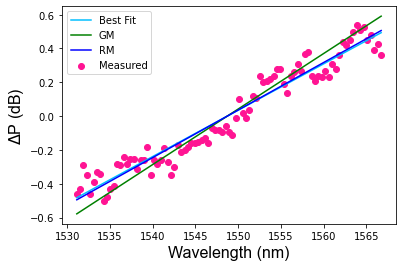

In [64]:
# COSMOS data 90 randomly loaded channels
activated_channels_90 = np.arange(1, 91)

output_spectrum_90 = [-11.55, -11.48, -11.520000000000001, -11.43,
                      -11.459999999999999, -11.38, -11.400000000000002,
                      -11.370000000000001, -11.41, -11.460000000000003, -11.49,
                      -11.470000000000002, -11.55, -11.629999999999999,
                      -11.599999999999998, -11.68, -11.639999999999999,
                      -11.679999999999998, -11.669999999999998, -11.7, -11.67,
                      -11.530000000000001, -11.54, -11.639999999999999,
                      -11.599999999999998, -11.65, -11.669999999999998, -11.77,
                      -11.719999999999999, -11.629999999999999,
                      -11.629999999999999, -11.669999999999998, -11.69, -11.7,
                      -11.71, -11.669999999999998, -11.8, -11.790000000000001,
                      -11.870000000000001, -11.92, -11.890000000000002, -11.81,
                      -11.919999999999998, -12.02, -12.000000000000002,
                      -11.970000000000002, -12.0, -11.99, -11.99, -11.98,
                      -12.069999999999999, -12.040000000000001, -12.05,
                      -12.059999999999999, -12.069999999999999,
                      -12.069999999999999, -12.09, -12.11, -12.12,
                      -12.079999999999998, -12.209999999999999, -12.26, -12.18,
                      -12.099999999999998, -12.169999999999998, -12.19,
                      -12.169999999999998, -12.26, -12.089999999999998,
                      -12.169999999999998, -12.169999999999998, -12.22, -12.16,
                      -12.16, -12.190000000000001, -12.149999999999999, -12.2,
                      -12.19, -12.32, -12.34, -12.39, -12.41, -12.25,
                      -12.239999999999998, -12.3, -12.370000000000001, -12.26,
                      -12.2, -12.34, -12.370000000000001]


output_spectrum_90 = output_spectrum_90 - np.mean(output_spectrum_90)
wav = convertToWavelength(activated_channels_90)

# line of best fit
tilt, y1 = computeEndToEndTilt(activated_channels_90, output_spectrum_90)
plt.scatter(wav, output_spectrum_90, color="deeppink", label='Measured')
plt.plot([min(wav), max(wav)], [min(y1), max(y1)], color='deepskyblue',
         label='Best Fit')

# General model - gm
gm90 = readCSVData("preamp_in_50_Actual_0_Gen90")
gm90_tilt, gm90_y1 = computeEndToEndTilt(activated_channels_90, gm90)
plt.plot([min(wav), max(wav)], [min(gm90_y1), max(gm90_y1)], color='g',
         label='GM')

# Rectangular model - rm
rm90 = readCSVData("preamp_in_50_Actual_0_Rec90")
rm90_tilt, rm90_y1 = computeEndToEndTilt(activated_channels_90, rm90)
plt.plot([min(wav), max(wav)], [min(rm90_y1), max(rm90_y1)], color='b',
         label='RM')

plotProperties()
